In [1]:
#this script plots temperature data

#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.
#ExampleDataA can be found at
#www.renewables.ninja and Gelaro et al. (2017), doi: 10.1175/JCLI-D-16-0758.1 - Oxford Air Temperature


import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [2]:
#import the RadCam Lower Reading Room 5 minute temp and humidity data

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\ExampleDataA.csv",)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
del df['Humidity']

df = df.sort_values(by="DateTime")
df.set_index('DateTime')



#http://blog.josephmisiti.com/group-by-datetimes-in-pandas
#df['Date'] = df["DateTime"].apply( lambda df : 
#datetime.datetime(year=df.year, month=df.month, day=df.day))	
#df.set_index(df["Date"],inplace=True)

#df = df.resample('d').mean()


,Temperature
DateTime,
2019-11-01 00:02:00,18.5
2019-11-01 00:07:00,18.5
2019-11-01 00:12:00,18.5
2019-11-01 00:17:00,18.4
2019-11-01 00:22:00,18.4
...,...
2020-11-13 14:21:00,21.1
2020-11-13 14:27:00,21.0
2020-11-13 14:31:00,21.0


In [3]:
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day_name()
df['Date']=df['DateTime'].dt.date
df['Hour']=df['DateTime'].dt.hour
df.head(3000)

,DateTime,Temperature,Month,Day,Date,Hour
0,2019-11-01 00:02:00,18.5,November,Friday,2019-11-01,0
1,2019-11-01 00:07:00,18.5,November,Friday,2019-11-01,0
2,2019-11-01 00:12:00,18.5,November,Friday,2019-11-01,0
3,2019-11-01 00:17:00,18.4,November,Friday,2019-11-01,0
4,2019-11-01 00:22:00,18.4,November,Friday,2019-11-01,0
...,...,...,...,...,...,...
2995,2019-11-11 17:09:00,19.8,November,Monday,2019-11-11,17
2996,2019-11-11 17:15:00,19.8,November,Monday,2019-11-11,17
2997,2019-11-11 17:20:00,19.8,November,Monday,2019-11-11,17
2998,2019-11-11 17:25:00,19.8,November,Monday,2019-11-11,17


In [11]:
df1 = df.groupby(['Month', 'Hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Hour')
heatmap_data.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
April,19.795065,19.651344,19.497500,19.371858,19.241758,19.112088,18.997802,18.938122,19.593801,20.163736,...,20.673370,20.794795,20.910598,20.975414,20.858038,20.627473,20.489617,20.376986,20.189918,19.988800
August,23.614062,23.564858,23.504348,23.418684,23.321123,23.260753,23.191444,23.272296,23.509140,23.714737,...,24.213577,24.353646,24.431675,24.399733,24.246032,24.065445,23.917196,23.798408,23.712500,23.607124
December,16.992437,16.733699,16.532500,16.356319,16.181215,16.033791,16.235813,17.204054,17.587766,18.130376,...,19.087855,19.092932,19.059626,18.976694,18.891304,18.795041,18.504301,18.047283,17.699174,17.362500
February,17.596893,17.327350,17.090935,16.857507,16.662994,16.494663,16.521067,17.581870,18.097740,18.688764,...,19.766760,19.818258,19.705764,19.561254,19.427171,19.327635,19.031638,18.660795,18.199446,17.752575
January,17.383019,17.154692,16.928533,16.740811,16.563467,16.410000,16.455014,17.529787,17.825538,18.311828,...,19.418997,19.475733,19.432454,19.350134,19.263859,19.084196,18.854891,18.366213,17.982306,17.657033


In [5]:
cols = list(heatmap_data)
#cols.insert(0, cols.pop(cols.index('Monday')))

#heatmap_data = heatmap_data.loc[:, cols]

#months for heatmap
Months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[Months]
list(heatmap_data)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

Text(0.5, 1.0, 'RadCam LRR Temperature (°C)')

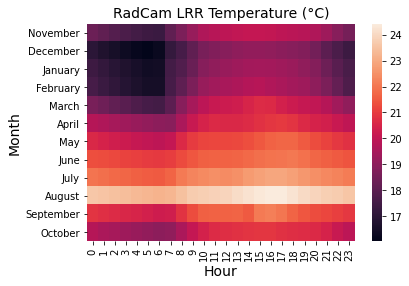

In [6]:
#plot the heatmap
sns.heatmap(heatmap_data)
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title("RadCam LRR Temperature (°C)", size=14)

In [7]:
list(heatmap_data)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]